# Laboratorio di simulazione numerica

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string
from scipy.optimize import curve_fit

### Exercise 01.1

In this exercise I tested the random number generator, drawing a set of uniformly distributed numbers.
These numbers were divided in blocks; in each block, for $n=1,2,\dotsc,N$, I calculated its average value $x_n$; from the sequence $\{x_n\}_{n=1}^{N}$ I then calculated the overall average and variance, as the number of blocks increased. Lastly, I ran a chi-squared test on each block.
The results are plotted below. The red dotted line marks the expected value of each quantity, for reference.

In [2]:
prefix = "exercise01-1/"

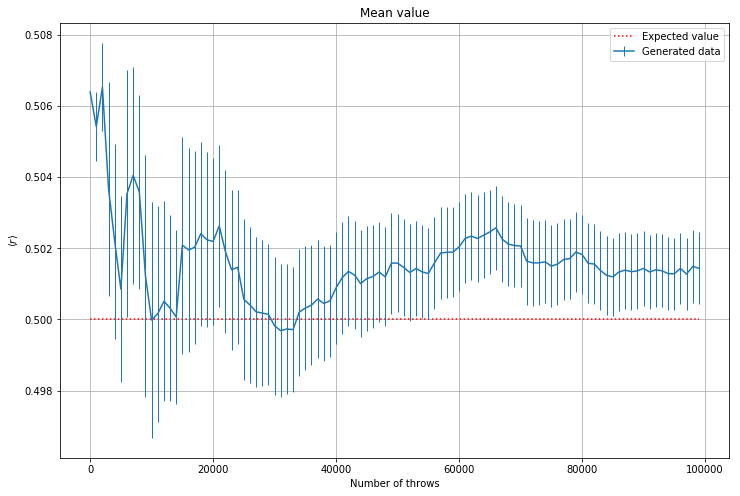

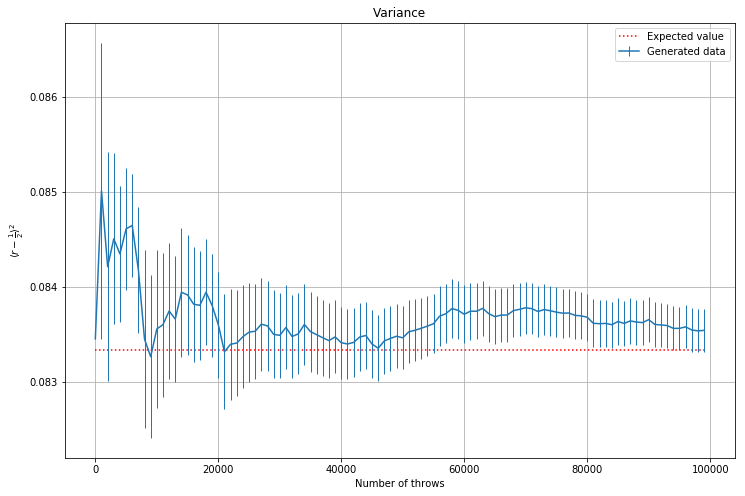

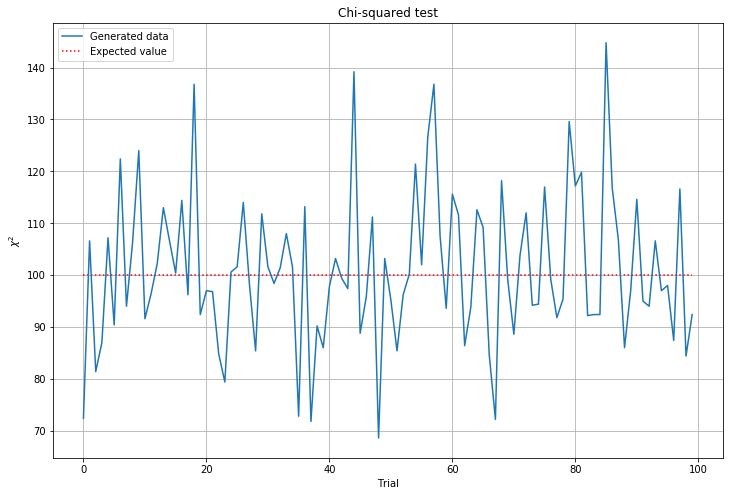

Mean chi-squared value: 101.068 +- 14.732907927493473


In [3]:
## Mean value

# Data collection
filename = prefix + "uniformd_average.dat";
n_throws, mean_avg, mean_std = np.loadtxt(filename, delimiter = " ", unpack = True)

# Plot
plt.figure(1, figsize = (12, 8))
plt.hlines(
    1/2,
    0, # Start of horizontal line
    n_throws[-1], # End == total number of throws, i.e. input data points.
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.errorbar(
    n_throws,
    mean_avg,
    yerr = mean_std,
    elinewidth = 1,
    label = "Generated data"
)
plt.title("Mean value")
plt.xlabel(r"Number of throws")
plt.ylabel(r"$\langle r\rangle$")
plt.legend()
plt.grid(True)

## Variance

# Data collection
filename = prefix + "uniformd_variance.dat";
n_throws, variance_avg, variance_std = np.loadtxt(filename, delimiter = " ", unpack = True)

# Plot
plt.figure(2, figsize = (12, 8))
plt.hlines(
    1/12,
    0, # Start of horizontal line
    n_throws[-1], # End == total number of throws, i.e. input data points.
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.errorbar(
    n_throws,
    variance_avg,
    yerr = variance_std,
    elinewidth = 1,
    label = "Generated data"
)
plt.title("Variance")
plt.xlabel("Number of throws")
plt.ylabel(r"$\langle r-\frac{1}{2}\rangle^2$")
plt.legend()
plt.grid(True)

## Chi-squared test

# Data collection
filename = prefix + "uniformd_chisquared_test.dat";
trials, chisquared = np.loadtxt(filename, delimiter = " ", unpack = True)

plt.figure(3, figsize = (12, 8))
plt.plot(
    trials,
    chisquared,
    label = "Generated data"
)
plt.hlines(
    100,
    0, # Start of horizontal line
    trials[-1], # End == total number of trials, i.e. input data points.
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.title("Chi-squared test")
plt.xlabel("Trial")
plt.ylabel(r"$\chi^2$")
plt.legend()
plt.grid(True)

plt.show()

print("Mean chi-squared value: " + str(np.mean(chisquared)) + " +- " + str(np.std(chisquared)))

At the right end of the plots, the average value of the variance is within the error bar, but the mean value is not, although it surely is within twice the standard deviation from the expected value.
While this is not an optimal result, it is certainly okay.
The last plot shows that the generated data passed the chi-squared test.

### Exercise 01.2

In this exercise I tested the result of taking the average of a large quantity of random numbers drawn from the same distribution.
More precisely, for each distribution I took the average of a fixed quantity $N$ (here equal to 10000) of numbers, each of which was itself the average of a set (of size $M$) of numbers generated from the same distribution.
I plotted the results below, varying the size $M$.

The first two distributions, the uniform one and the exponential one, have a finite variance, therefore the average should follow, from the central limit theorem, a normal distribution.
The last one is a Cauchy-Lorentz distribution, to which the previous theorem does not apply; however this distribution is stable, so the average should follow the Cauchy-Lorentz distribution too.

That this happens is evident looking at the blue plots, in which an average of 100 "blocks" was taken.
I fitted a normal distribution density function (for the first two) and a Cauchy-Lorentz density function (for the last) to the histograms with the highest $M$.

In [4]:
colors = ["firebrick", "darkorange", "limegreen", "royalblue"]
prefix = "exercise01-2/"

/opt/intel/intelpython3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


* uniform:
The fitted normal distribution has a mean value of 5.00e-01 +- 2.68e-04 and a variance of 8.47e-04 +- 1.27e-05.
* exponential:
The fitted normal distribution has a mean value of 9.94e-01 +- 1.07e-03 and a variance of 9.59e-03 +- 1.71e-04.
* cauchylorentz:
The fitted Cauchy-Lorentz distribution has a median value of -6.15e-03 +- 7.43e-03 and a scale parameter of 9.94e-01 +- 7.46e-03.


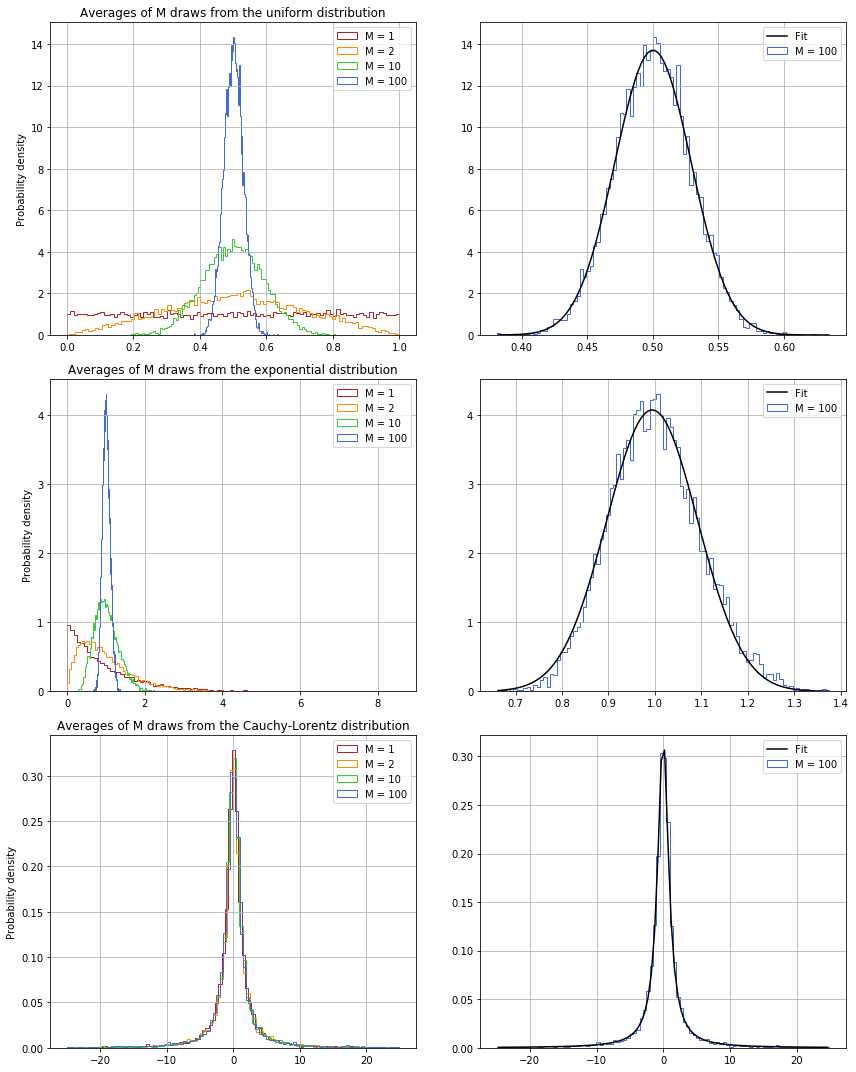

In [5]:
distributions = ["uniform", "exponential", "cauchylorentz"]
dist_name = {
    "uniform": "uniform",
    "exponential": "exponential",
    "cauchylorentz" : "Cauchy-Lorentz"
}

def gauss(x, mean, variance):
    return 1 / np.sqrt(2 * np.pi * variance) * np.exp(-(x - mean)**2 / (2 * variance))

def cauchylorentz(x, median, scale):
    return 1 / np.pi * scale / ((x - median)**2 + scale**2)

fit_functions = {
    "uniform": gauss,
    "exponential": gauss,
    "cauchylorentz" : cauchylorentz
}
limit_dist_name = {
    "uniform": ["normal", "mean", "variance"],
    "exponential": ["normal", "mean", "variance"],
    "cauchylorentz" : ["Cauchy-Lorentz", "median", "scale parameter"]
}

fig, axes = plt.subplots(nrows = len(distributions), ncols = 2, figsize = (6 * 2, 5 * len(distributions)))
axes = axes.flatten()

# Data collection
for d_count, dist in enumerate(distributions):
    filename = prefix + "central_limit_theorem_" + dist + "d.dat"
    n_bins = 100

    # The first row contains the number of draws used to compute the average.
    with open(filename) as f:
        n_draws = f.readline().strip()
    # 'strip()' removes the trailing newline element that would otherwise
    # be included in the list.
    n_draws = n_draws.split()
    
    # Input data.
    data = np.loadtxt(filename, skiprows = 1, unpack = True)
    
    if dist == "cauchylorentz":
        # Unfortunately it happens that some numbers are way too high, and as a result
        # the histogram is poorly drawn since the other numbers are compressed in few
        # bins. For this reason we exclude them from the plot; this should not change
        # the distribution in a signficant way.
        lim_sup = 25
        out_of_bounds_indices = []
        clean_data = []
        for data_list in data:
            for i in range(len(data_list)):
                if(abs(data_list[i]) > lim_sup):
                    out_of_bounds_indices.append(i)
            clean_data.append(np.delete(data_list, out_of_bounds_indices))
        data = clean_data

    # Plot
    # ----
    # The histograms are normalized (with 'density = True') to a total area of 1.
    for k in range(len(data) - 1):
        axes[d_count * 2].hist(
            data[k],
            bins = n_bins,
            label = "M = " + n_draws[k],
            density = True,
            color = colors[k],
            histtype = "step"
        )
    # The last histogram is the one with the highest "M":
    # save its results for the gaussian fit below.
    bin_values, bins, patches = axes[d_count * 2].hist(
        data[-1],
        bins = n_bins,
        label = "M = " + n_draws[-1],
        density = True,
        color = colors[-1],
        histtype = "step"
    )
    axes[d_count * 2].set_title("Averages of M draws from the " + dist_name[dist] + " distribution")
    axes[d_count * 2].set_ylabel("Probability density")
    axes[d_count * 2].grid(True)
    axes[d_count * 2].legend()

    # From 'bins' create an array that contains the centre of each bin
    bin_centres = [0.5 * (bins[i + 1] + bins[i]) for i in range(len(bins) - 1)]

    optimal_values, covariance_matrix = curve_fit(fit_functions[dist], bin_centres, bin_values)
    axes[d_count * 2 + 1].hist(
        data[-1],
        bins = n_bins,
        label = "M = " + n_draws[-1],
        density = True,
        color = colors[-1],
        histtype = "step"
    )
    axes[d_count * 2 + 1].plot(
        bin_centres,
        [fit_functions[dist](x, optimal_values[0], optimal_values[1]) for x in bin_centres],
        label = "Fit",
        color = "black"
    )
    axes[d_count * 2 + 1].grid(True)
    axes[d_count * 2 + 1].legend()

    print("* " + dist + ":\nThe fitted " + limit_dist_name[dist][0] + " distribution has a " + limit_dist_name[dist][1] + " value of "
        + "{:.2e}".format(optimal_values[0]) + " +- " + "{:.2e}".format(np.sqrt(covariance_matrix[0][0]))
        + " and a " + limit_dist_name[dist][2] + " of "
        + "{:.2e}".format(optimal_values[1]) + " +- " + "{:.2e}".format(np.sqrt(covariance_matrix[1][1]))
        + ".")
    
fig.tight_layout()
plt.show()

It is evident that the central limit theorem works here, since the normal distributions approximate so well the distributions in the first two cases.
Regarding the last row of plots, on the left we see very clearly the self-similarity feature of the Cauchy-Lorentz distribution: the four plots are nearly identical for different values of $M$.

### Exercise 01.3

In this exercise I simulated Buffon's experiment to compute an approximation of the value of $\pi$.

I simulated the throw of a stick of length $L$ on a "floor" on which parallel lines, at a fixed distance $d$ each one from the next one, were drawn.
The number $N_\mathrm{hits}$ of times the stick crossed a line, divided by the total number $N_\mathrm{throws}$ of tries, gives an estimate of $\pi$ as
$$
\pi\approx\frac{2LN_\mathrm{throws}}{N_\mathrm{hits}d}.
$$

Fixing $N_\mathrm{throws}$ to 1000, I repeated the simulation 10000 times, and in the end I calculated the average value and its standard deviation dividing the results in block os 100 elements.
The red dotted line marks the exact value of $\pi$ for reference.

The floor was modelled as the square $[0,10]\times[0,10]$, ruled by straight lines given by the equation $x=n$ (for $n=0,1,\dotsc,10$).
To simulate the throw mechanism, I assumed that the probabilities of getting a given value for the position of its centre and its orientation on the floor were uniform.
Firstly, I generated a couple of points $(x_1,x_2)$ representing the coordinates of an endpoint of the stick; secondly, I generated a number in the unit disk[1] centred on the previous point, then I rescaled it along the line passing through $(x_1,x_2)$ and itself in order to have a point at distance $L$ from the first endpoint.
With this procedure I obtained the position of the two ends of the stick, and using this information I determined if it crossed a line.

[1] In order to generate the point in the unit disk I generated first of all a point in the unit rectangle $[-1,1]\times[-1,1]$, with uniformly distributed coordinates, then I accepted it if its distance from the origin was less than 1, otherwise I rejected it and generated another one.

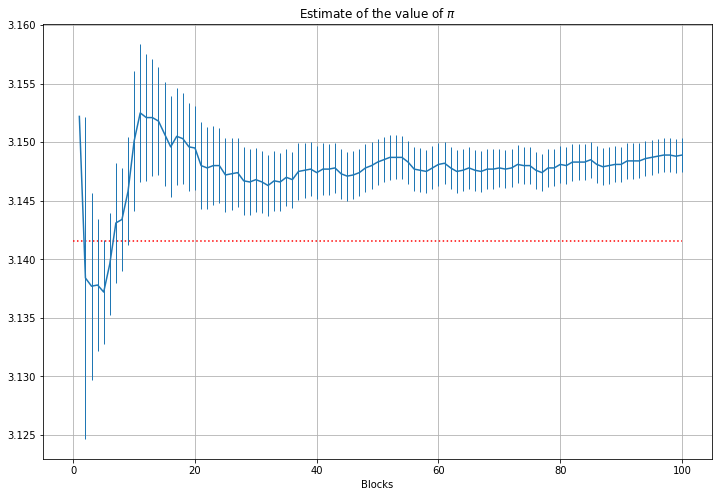

My estimate for pi is 3.15e+00 +- 1.42e-03.


In [6]:
# Data collection
filename = "exercise01-3/pi_estimate.dat"

estimate, std = np.loadtxt(filename, skiprows = 1, unpack = True)

plt.figure(figsize = (12, 8))
plt.hlines(
    np.pi,
    0,
    len(estimate),
    colors = "red",
    label = r"Exact value of $\pi$",
    linestyle = "dotted"
)
plt.errorbar(
    range(1, len(estimate) + 1),
    estimate,
    yerr = std,
    elinewidth = 1,
    label = "Estimate"
)
plt.title(r"Estimate of the value of $\pi$")
plt.xlabel("Blocks")
plt.grid(True)

plt.show()

print("My estimate for pi is "
      + "{:.2e}".format(estimate[-1]) + " +- " + "{:.2e}".format(std[-1])
      + ".")